In [1]:
include("funciones.jl")
include("Taylor.jl")
using ADT, ODE, PyPlot

# Proyecto Final
## Temas Selectos de Física Computacional.
### Tema
- **Oscilador periódicamente forzado**

	C. Simó, Global dynamics and fast indicators, in Broer et al (Eds), Global Analysis of Dynamical Systems (2001), pp 373-389.

### Un modelo en $ 1 \frac{1}{2} $ grados de libertad.


$$ \ddot{x} = (\alpha + \beta \cos{(t)}) \sin{(x)}$$

Este problema ha recibido mucha atencion debido a que es uno de los mas simples que muestra todas las dinamicas de su clase.

Para simplificar el analisis, modificaremos el oscilador parametrico de la siguiente forma

$$\ddot{x} = \alpha (1 + \frac{\beta}{\alpha} \cos{(t)}) \sin{(x)} $$

Tal que si fijamos $\alpha = 1$ podemos solo enfocarnos en el comportamiento respecto a $\beta$

$$\ddot{x} =  (1 + \beta \cos{(t)}) \sin{(x)} $$

Pero antes de empezar, comprobemos que el integrador de Taylor funciona. Para esto es comparado con el integrador `ODE78` contenido en el modulo ODE para un sistema conocido.

$$ \ddot{x} = -x $$

Para el cual, tambien calculamos la energia.

$$ E = \frac{1}{2} ( \dot{x}^2 + x^2) $$

In [2]:
x̄0 = [1.0, 0.0]
t0, tf = 0.0, 100.0
t = linspace(t0, tf, 100)

E0 = energiaDePruebas(0, x̄0[1], x̄0[2])

t_ode, sol_ode = ode78(osciladorDePruebas, x̄0, t)
x_ode = map(x -> x[1], sol_ode)
y_ode = map(x -> x[2], sol_ode)
E_ode = energiaDePruebas.(t_ode, x_ode, y_ode)


t_tay, sol_tay = integradorT2(osciladorDePruebas, x̄0, t0, tf)
x_tay = map(x -> x[1], sol_tay)
y_tay = map(x -> x[2], sol_tay)
E_tay = energiaDePruebas.(t_tay, x_tay, y_tay);

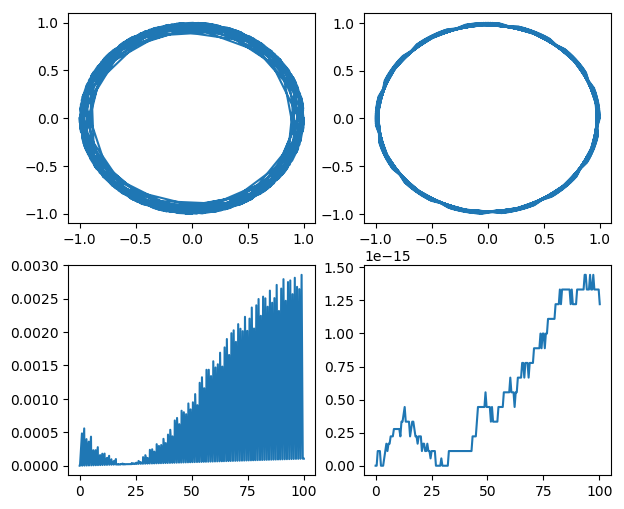

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5a75ec0d68>

In [3]:
p = figure(figsize = (7, 6))

ax = subplot(221); bx = subplot(222); cx = subplot(223); dx = subplot(224)
ax[:plot](x_ode, y_ode)
bx[:plot](x_tay, y_tay)
cx[:plot](t_ode, abs(E_ode - E0))
dx[:plot](t_tay, abs(E_tay - E0))

Ahora procedemos a analizar el sistema parametrico. Al igual que en el caso anterior, calculamos la energia como:

$$ E = \frac{1}{2}\dot{x}^2 + (1 + \beta \cos{(t)}) \cos{(x)} $$

In [4]:
x̄0 = [1.0, 0.0]
t0, tf = 0.0, 200.0
β  = 1.0
t = linspace(t0, tf, 1000)

t_ode, sol_ode = ode78(osciladorParametrico, x̄0, t)
x_ode = map(x -> x[1], sol_ode)
y_ode = map(x -> x[2], sol_ode)
E_ode = energiaDePruebas.(t_ode, x_ode, y_ode)

t_tay, sol_tay = integradorT2(osciladorParametrico, x̄0, t0, tf)
x_tay = map(x -> x[1], sol_tay)
y_tay = map(x -> x[2], sol_tay)
E_tay = energiaDePruebas.(t_tay, x_tay, y_tay);

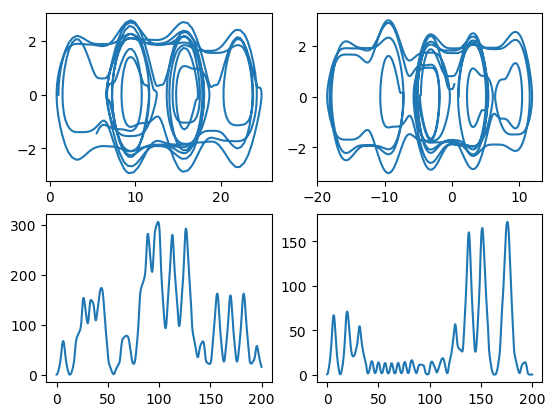

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5a737d0be0>

In [5]:
q = figure()

ax = subplot(221); bx = subplot(222); cx = subplot(223); dx = subplot(224)
ax[:plot](x_ode, y_ode)
bx[:plot](x_tay, y_tay)
cx[:plot](t_ode, E_ode)
dx[:plot](t_tay, E_tay)

In [6]:
x̄0 = [1.0, 0.0]
t0, tf = 0.0, 100.0
lista1 = []

for i = 1:5
    β  = 1.0 * i

    t_tay, sol_tay = integradorT2(osciladorParametrico, x̄0, t0, tf)
    push!(lista1, sol_tay)
end

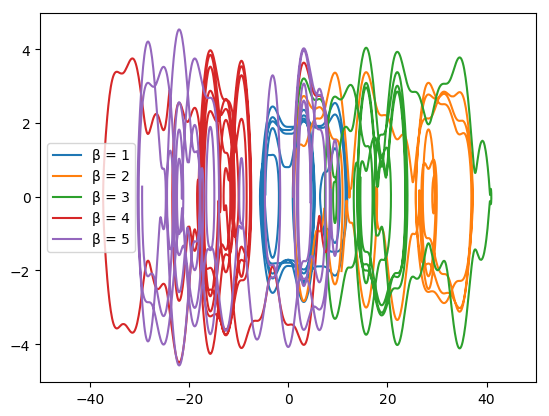

PyObject <matplotlib.legend.Legend object at 0x7f5a7372e2b0>

In [7]:
n = 1
for sol in lista1
    x1 = map(x -> x[1], sol)
    y1 = map(x -> x[2], sol)
    
    plot(x1, y1, label = "β = $n")
    n += 1
end
xlim(-50, 50)
legend()

In [8]:
t0, tf = 0.0, 100.0
β  = 1.0
lista2 = []

for i = 1:5
    x̄0 = [0.2 * i, 0.0]
    t_tay, sol_tay = integradorT2(osciladorParametrico, x̄0, t0, tf)
    push!(lista2, sol_tay)

end

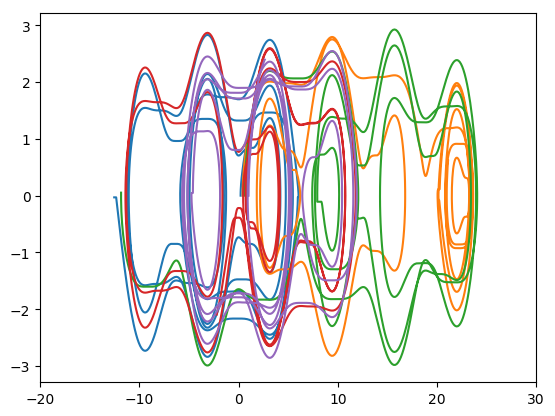

(-20,30)

In [9]:
n = 1
for sol in lista2
    x2 = map(x -> x[1], sol)
    y2 = map(x -> x[2], sol)
    
    plot(x2, y2, label = "β = $n")
    n += 1
end
xlim(-20, 30)